In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pandas import get_dummies
#import plotly.graph_objs as go
from sklearn import datasets
#import plotly.plotly as py
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 3.0.2
sklearn: 0.20.1
scipy: 1.1.0
seaborn: 0.9.0
pandas: 0.23.4
numpy: 1.15.4
Python: 3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]


In [3]:
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
sns.set_style('white')
np.random.seed(1337)
#show plot inline
%matplotlib inline

In [4]:
dataset = pd.read_csv('Iris.csv')
iris_Species = pd.read_csv('Iris.csv')
dataset.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
35,36,5.0,3.2,1.2,0.2,Iris-setosa
125,126,7.2,3.2,6.0,1.8,Iris-virginica
29,30,4.7,3.2,1.6,0.2,Iris-setosa
130,131,7.4,2.8,6.1,1.9,Iris-virginica
32,33,5.2,4.1,1.5,0.1,Iris-setosa
19,20,5.1,3.8,1.5,0.3,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [6]:
type(iris_Species)

pandas.core.frame.DataFrame

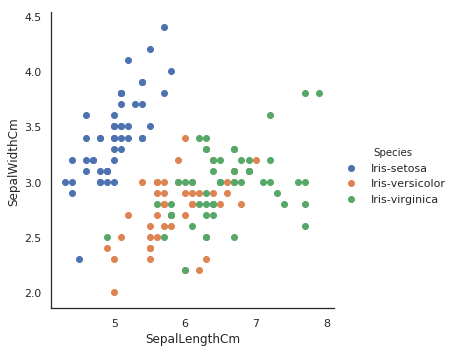

In [7]:
# Modify the graph above by assigning each species an individual color.
sns.FacetGrid(dataset, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

<Figure size 432x288 with 0 Axes>

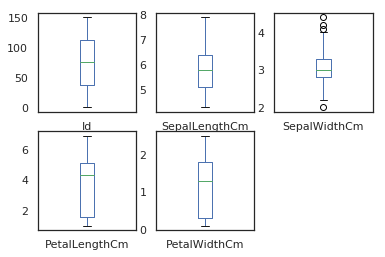

<Figure size 432x288 with 0 Axes>

In [8]:
dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.figure()
#This gives us a much clearer idea of the distribution of the input attributes:

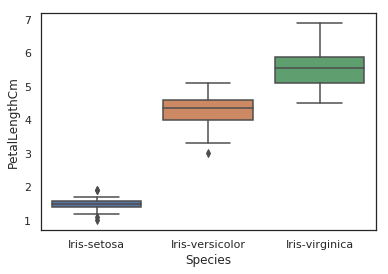

In [9]:
# To plot the species data using a box plot:

sns.boxplot(x="Species", y="PetalLengthCm", data=dataset )
plt.show()

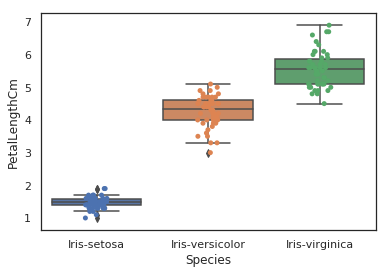

In [10]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis. 

ax= sns.boxplot(x="Species", y="PetalLengthCm", data=dataset)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=dataset, jitter=True, edgecolor="gray")
plt.show()

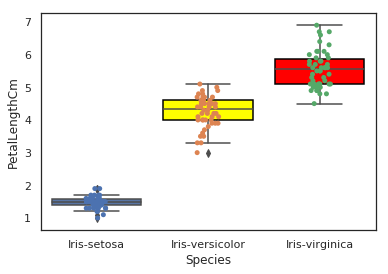

In [11]:
# Tweek the plot above to change fill and border color color using ax.artists.
# Assing ax.artists a variable name, and insert the box number into the corresponding brackets

ax= sns.boxplot(x="Species", y="PetalLengthCm", data=dataset)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=dataset, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()

<Figure size 432x288 with 0 Axes>

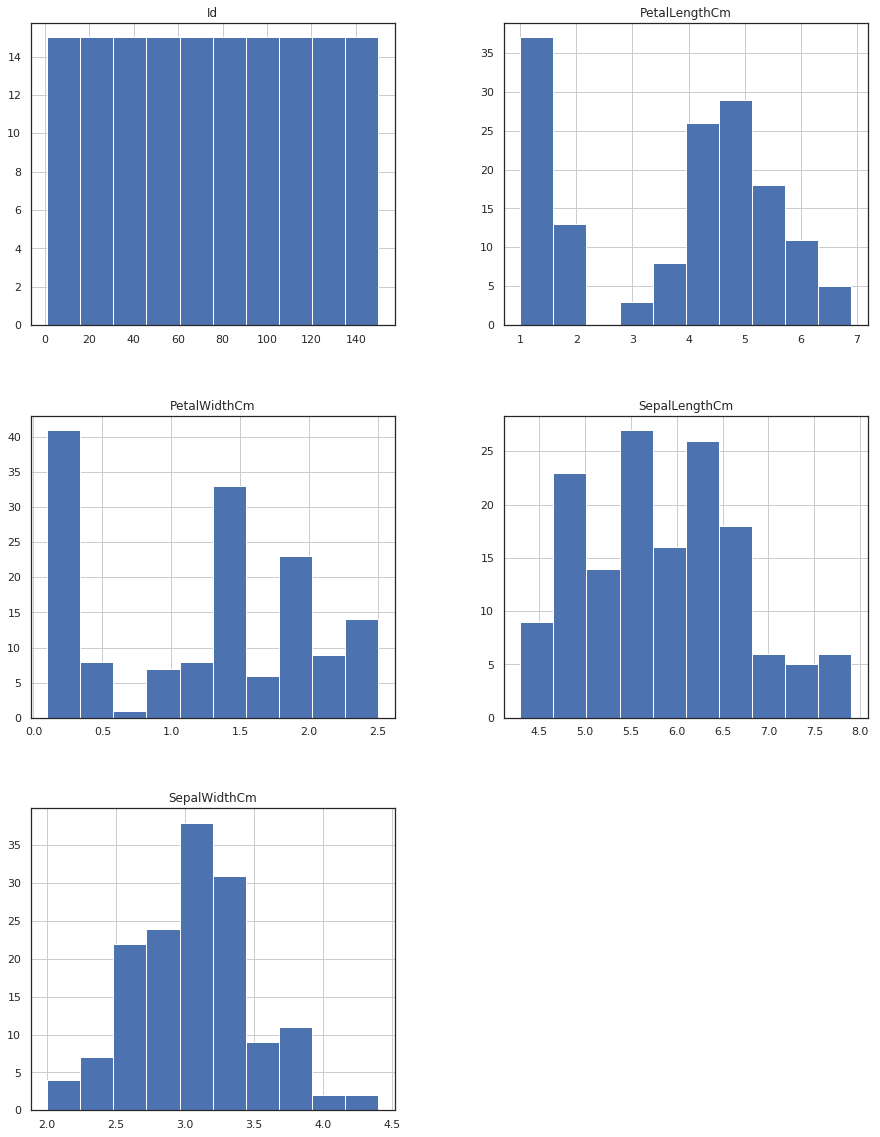

<Figure size 432x288 with 0 Axes>

In [12]:
# histograms
dataset.hist(figsize=(15,20))
plt.figure()

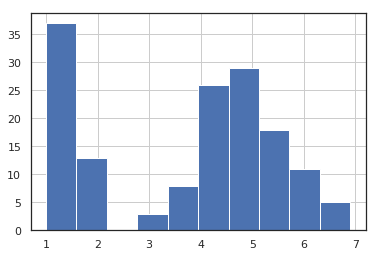

In [13]:
dataset["PetalLengthCm"].hist();

<Figure size 432x288 with 0 Axes>

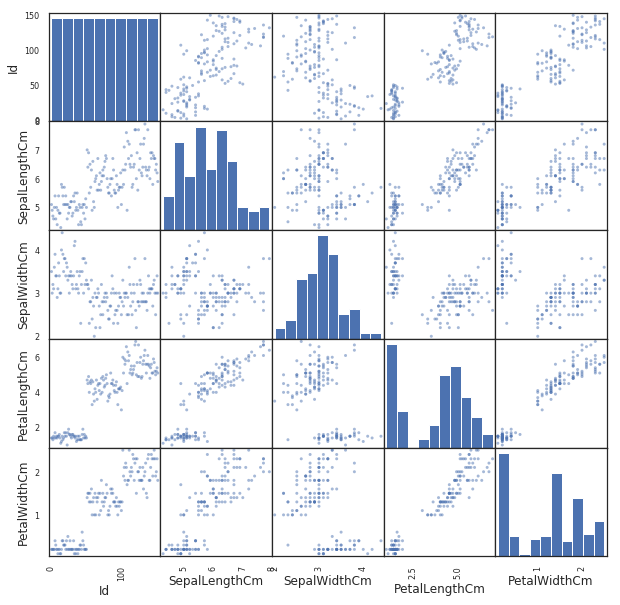

<Figure size 432x288 with 0 Axes>

In [14]:
# scatter plot matrix
pd.plotting.scatter_matrix(dataset,figsize=(10,10))
plt.figure()

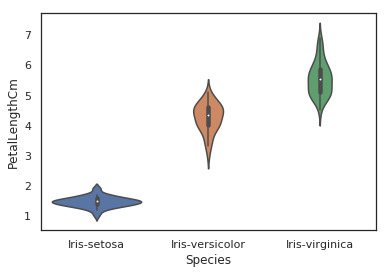

In [15]:
# violinplots on petal-length for each species
sns.violinplot(data=dataset,x="Species", y="PetalLengthCm")

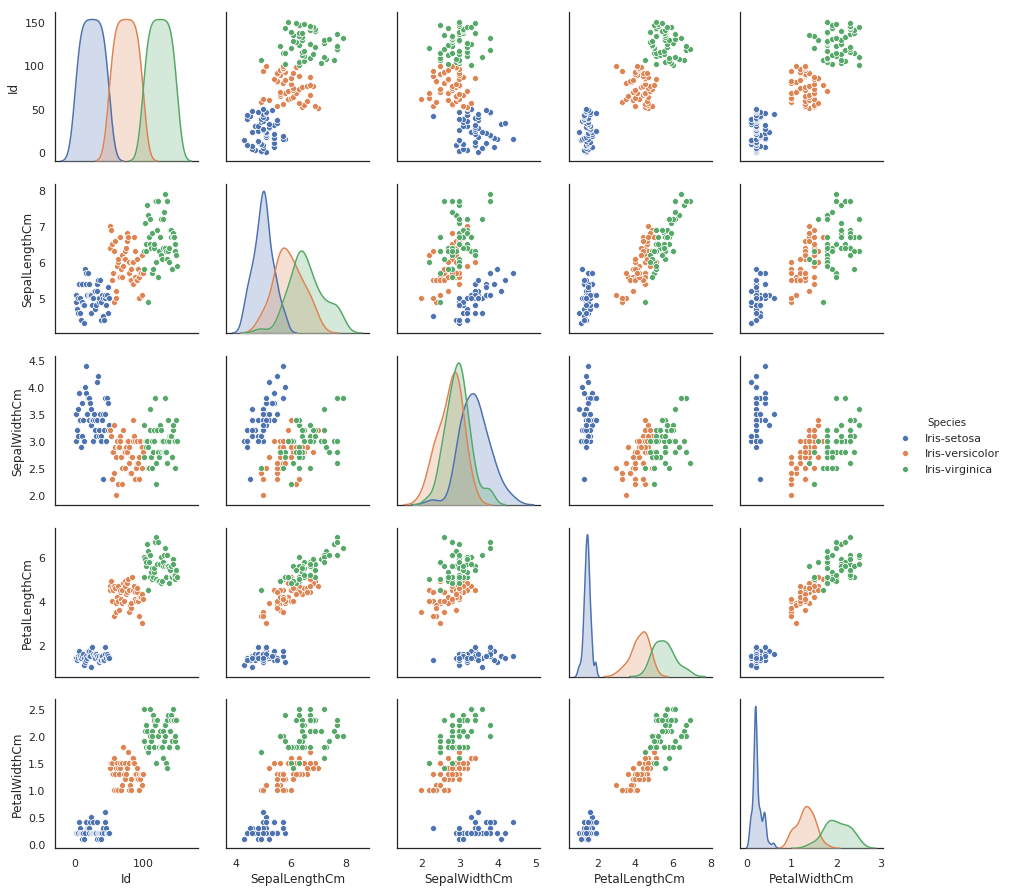

In [16]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(dataset, hue="Species")

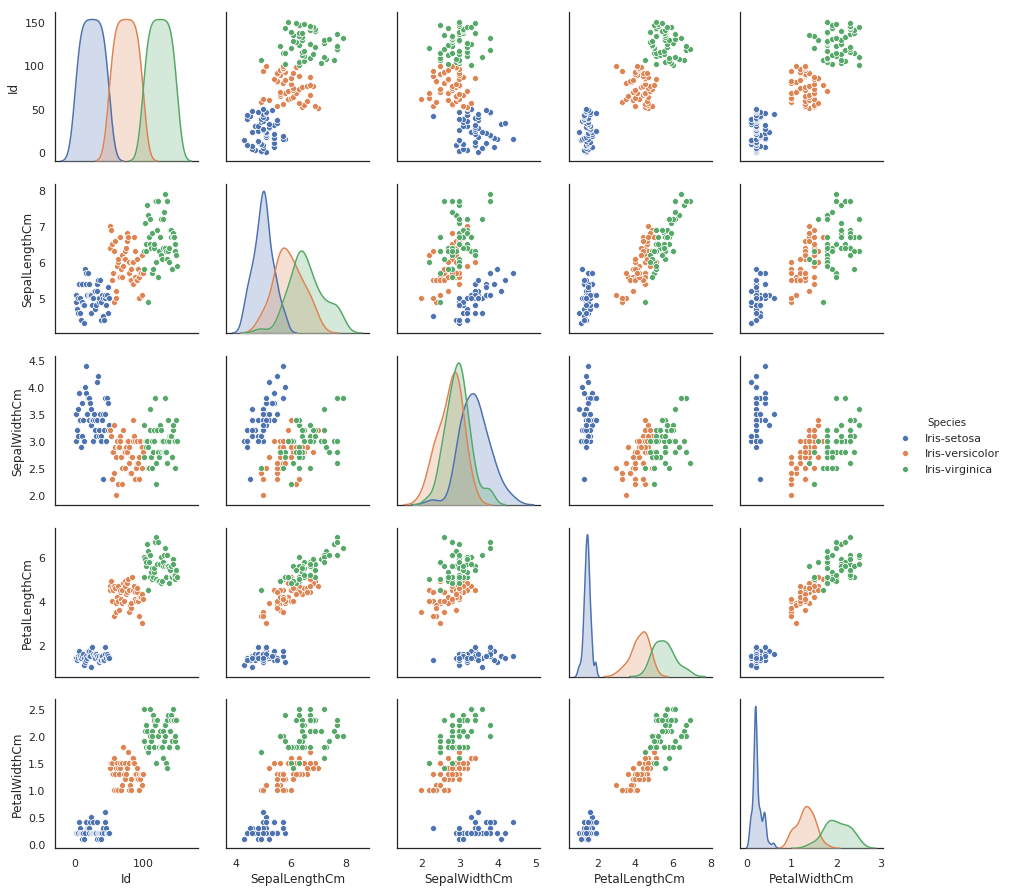

In [17]:
# updating the diagonal elements in a pairplot to show a kde
sns.pairplot(dataset, hue="Species",diag_kind="kde")

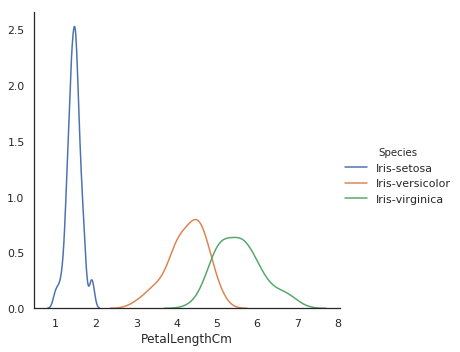

In [18]:
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used
sns.FacetGrid(dataset, hue="Species", size=5).map(sns.kdeplot, "PetalLengthCm").add_legend()
plt.show()

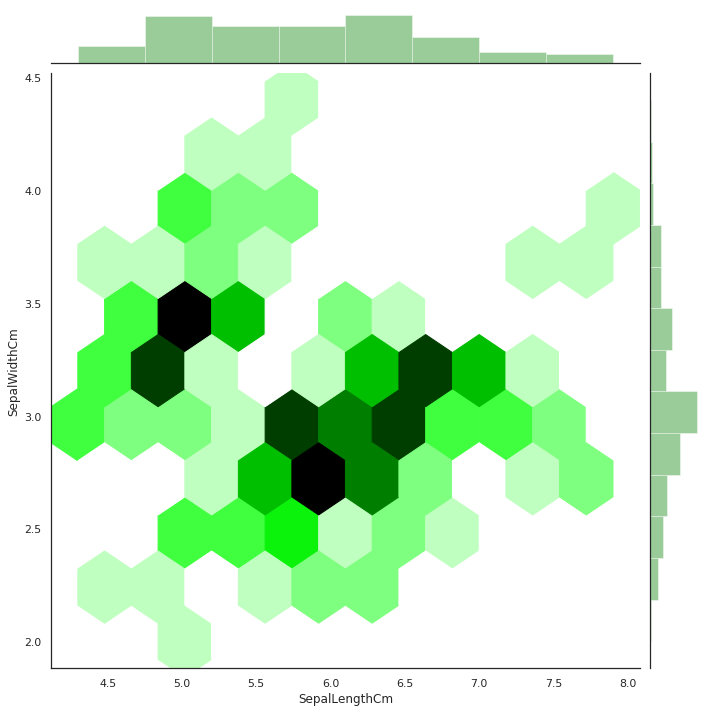

In [19]:
# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=dataset, size=10,ratio=10, kind='hex',color='green')
plt.show()

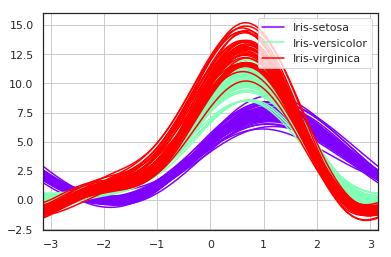

In [20]:
#In Pandas use Andrews Curves to plot and visualize data structure.
#Each multivariate observation is transformed into a curve and represents the coefficients of a Fourier series.
#This useful for detecting outliers in times series data.
#Use colormap to change the color of the curves

from pandas.tools.plotting import andrews_curves
andrews_curves(dataset.drop("Id", axis=1), "Species",colormap='rainbow')
plt.show()

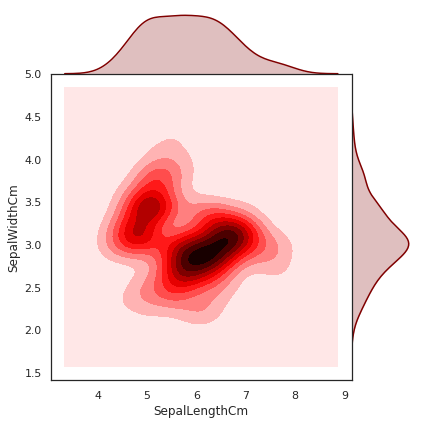

In [21]:
# we will use seaborn jointplot shows bivariate scatterplots and univariate histograms with Kernel density 
# estimation in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=dataset, size=6, kind='kde', color='#800000', space=0)

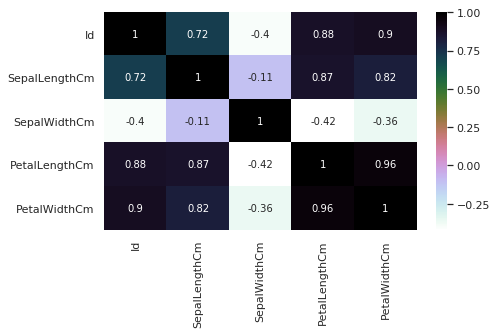

In [22]:
plt.figure(figsize=(7,4)) 
sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

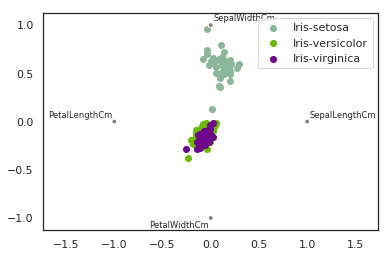

In [23]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(dataset.drop("Id", axis=1), "Species")

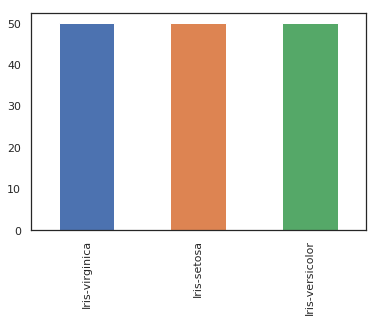

In [24]:
dataset['Species'].value_counts().plot(kind="bar");

In [25]:
# shape
print(dataset.shape)

(150, 6)


In [26]:
#columns*rows
dataset.size

900

In [27]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
dataset=dataset.dropna() 

In [29]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB
None


In [30]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
dataset['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [32]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [33]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [34]:
dataset.groupby('Species').count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [35]:
dataset.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [36]:
dataset.Species.sample(5)

84    Iris-versicolor
19        Iris-setosa
64    Iris-versicolor
39        Iris-setosa
54    Iris-versicolor
Name: Species, dtype: object

In [37]:
dataset.where(dataset['Species']=='Iris-setosa')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa
2,3.0,4.7,3.2,1.3,0.2,Iris-setosa
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa
5,6.0,5.4,3.9,1.7,0.4,Iris-setosa
6,7.0,4.6,3.4,1.4,0.3,Iris-setosa
7,8.0,5.0,3.4,1.5,0.2,Iris-setosa
8,9.0,4.4,2.9,1.4,0.2,Iris-setosa
9,10.0,4.9,3.1,1.5,0.1,Iris-setosa


In [38]:
dataset.where(dataset['Species']=='Iris-setosa').dropna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa
2,3.0,4.7,3.2,1.3,0.2,Iris-setosa
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa
5,6.0,5.4,3.9,1.7,0.4,Iris-setosa
6,7.0,4.6,3.4,1.4,0.3,Iris-setosa
7,8.0,5.0,3.4,1.5,0.2,Iris-setosa
8,9.0,4.4,2.9,1.4,0.2,Iris-setosa
9,10.0,4.9,3.1,1.5,0.1,Iris-setosa


In [39]:
dataset[dataset['SepalLengthCm']>7.2]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
105,106,7.6,3.0,6.6,2.1,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica


In [40]:
# Seperating the data into dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [41]:
X

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.50e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.60e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.70e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

In [42]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [43]:
cols = dataset.columns
features = cols[0:4]
labels = cols[4]
print(features)
print(labels)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'], dtype='object')
PetalWidthCm


In [44]:
features

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'], dtype='object')

In [45]:
labels

'PetalWidthCm'

In [46]:
#Well conditioned data will have zero mean and equal variance
#We get this automattically when we calculate the Z Scores for the data

data_norm = pd.DataFrame(dataset)

for feature in features:
    dataset[feature] = (dataset[feature] - dataset[feature].mean())/dataset[feature].std()

#Show that should now have zero mean
print("Averages")
print(dataset.mean())

print("\n Deviations")
#Show that we have equal variance
print(pow(dataset.std(),2))

Averages
Id               2.220446e-17
SepalLengthCm   -1.457168e-15
SepalWidthCm    -1.722511e-15
PetalLengthCm   -2.043551e-15
PetalWidthCm     1.198667e+00
dtype: float64

 Deviations
Id               1.000000
SepalLengthCm    1.000000
SepalWidthCm     1.000000
PetalLengthCm    1.000000
PetalWidthCm     0.582414
dtype: float64


In [48]:
dataset.groupby('Species').count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [49]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.714797,-0.897674,1.028611,-1.336794,0.2,Iris-setosa
1,-1.691780,-1.139200,-0.124540,-1.336794,0.2,Iris-setosa
2,-1.668762,-1.380727,0.336720,-1.393470,0.2,Iris-setosa
3,-1.645745,-1.501490,0.106090,-1.280118,0.2,Iris-setosa
4,-1.622728,-1.018437,1.259242,-1.336794,0.2,Iris-setosa
5,-1.599710,-0.535384,1.951133,-1.166767,0.4,Iris-setosa
6,-1.576693,-1.501490,0.797981,-1.336794,0.3,Iris-setosa
7,-1.553675,-1.018437,0.797981,-1.280118,0.2,Iris-setosa
8,-1.530658,-1.743017,-0.355171,-1.336794,0.2,Iris-setosa
9,-1.507641,-1.139200,0.106090,-1.280118,0.1,Iris-setosa


In [50]:
dataset.where(dataset ['Species']=='Iris-setosa')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.714797,-0.897674,1.028611,-1.336794,0.2,Iris-setosa
1,-1.691780,-1.139200,-0.124540,-1.336794,0.2,Iris-setosa
2,-1.668762,-1.380727,0.336720,-1.393470,0.2,Iris-setosa
3,-1.645745,-1.501490,0.106090,-1.280118,0.2,Iris-setosa
4,-1.622728,-1.018437,1.259242,-1.336794,0.2,Iris-setosa
5,-1.599710,-0.535384,1.951133,-1.166767,0.4,Iris-setosa
6,-1.576693,-1.501490,0.797981,-1.336794,0.3,Iris-setosa
7,-1.553675,-1.018437,0.797981,-1.280118,0.2,Iris-setosa
8,-1.530658,-1.743017,-0.355171,-1.336794,0.2,Iris-setosa
9,-1.507641,-1.139200,0.106090,-1.280118,0.1,Iris-setosa


In [51]:
cols = dataset.columns
features = cols[0:4]
labels = cols[4]
print(features)
print(labels)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'], dtype='object')
PetalWidthCm


In [52]:
#Well conditioned data will have zero mean and equal variance
#We get this automattically when we calculate the Z Scores for the data

data_norm = pd.DataFrame(dataset)

for feature in features:
    dataset[feature] = (dataset[feature] - dataset[feature].mean())/dataset[feature].std()

#Show that should now have zero mean
print("Averages")
print(dataset.mean())

print("\n Deviations")
#Show that we have equal variance
print(pow(dataset.std(),2))

Averages
Id               2.220446e-17
SepalLengthCm   -9.269437e-16
SepalWidthCm     1.253627e-16
PetalLengthCm    3.278859e-16
PetalWidthCm     1.198667e+00
dtype: float64

 Deviations
Id               1.000000
SepalLengthCm    1.000000
SepalWidthCm     1.000000
PetalLengthCm    1.000000
PetalWidthCm     0.582414
dtype: float64


In [63]:
indices = data_norm.index.tolist()
indices = np.array(indices)
np.random.shuffle(indices)
indices

array([ 71,  56, 110,  62, 107,  89,  20,  92,  88,  82,  51, 119,  66,
        22,  78, 118,  91, 104, 106,  86,  85,  13,  54,  79,  40, 113,
        75, 115,  84,  15,  12, 129,  98,  26, 126,  16,  17, 128, 139,
       136, 135,  81, 140,  67, 111,  68,  53,  46,  76, 124, 123,  21,
       133,  33, 117,  43, 125, 105, 101,  95, 142, 116,  74, 143, 138,
        19, 127,  25,  49, 132,  39,  35,  59,  57,  10,  83,  55,  30,
       103,  38, 141, 130, 120,  31,  80, 146, 122, 148,   6,  90,  52,
       109,   5,  42,  96,  36,  60, 134, 149, 100,  70,  97, 147, 145,
       114,  24,  44,  93,  28,  72,  18,   2,  69,   0,   3,  58, 121,
       112,  29,   9,  34, 144,   1,  32,  37, 102,  65,  50,  11,   8,
        48,  45,  94, 137,  99, 108,  14,  27,  61,  23,  73,  77,  63,
       131,   7,  64,   4,  41,  87,  47])

In [64]:
# One Hot Encode as a dataframe
from sklearn.model_selection import train_test_split
y = get_dummies(y)

# Generate Training and Validation Sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

# Convert to np arrays so that we can use with TensorFlow
X_train = np.array(X_train).astype(np.float32)
X_test  = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

In [65]:
#Check to make sure split still has 4 features and 3 labels
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 5) (105, 3)
(45, 5) (45, 3)


In [67]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.95      0.97        19
           2       0.92      1.00      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45
 samples avg       0.98      0.98      0.98        45

accuracy is 0.9777777777777777


In [68]:
print(confusion_matrix(y_test, y_pred))

ValueError: multilabel-indicator is not supported

In [69]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=8.0)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
#summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accouracy score
print('accuracy is ', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.95      0.97        19
           2       0.92      1.00      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45
 samples avg       0.98      0.98      0.98        45



ValueError: multilabel-indicator is not supported

In [70]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

ValueError: bad input shape (105, 3)

# perceptron

In [71]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [72]:
w = np.array([0.2, 0.3, 0.8])
b = 0.5
x = np.array([0.5, 0.6, 0.1])

In [73]:
z = w.dot(x) + b
print("z:", z)
print("a:", sigmoid(z))

z: 0.8600000000000001
a: 0.7026606543447316


# kmeans

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

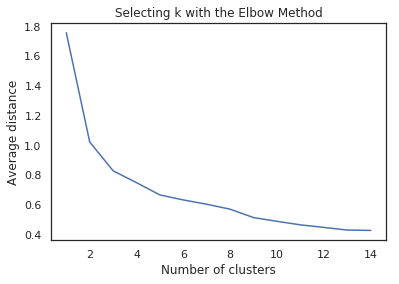

In [74]:
from sklearn.cluster import KMeans
iris_SP = dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
# k-means cluster analysis for 1-15 clusters                                              
from scipy.spatial.distance import cdist
clusters=range(1,15)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean 
# distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(iris_SP)
    clusassign=model.predict(iris_SP)
    meandist.append(sum(np.min(cdist(iris_SP, model.cluster_centers_, 'euclidean'), axis=1))
    / iris_SP.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 
# pick the fewest number of clusters that reduces the average distance
# If you observe after 3 we can see graph is almost linear